In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

In [2]:
%matplotlib inline

In [3]:
data = np.loadtxt("highp_finalresults.csv",skiprows=1,delimiter= ",")

In [4]:
#Hacemos una lista con los identificadores sin repetir de los planetas
col0 = list(set(np.int_(data[:,0])))
#Definimos el número de sistemas
n_sis = len(col0)

#Hacemos una lista con el numero de planetas por sistema
numPlanetas = np.ones(n_sis)
#Hacemos una lista con la masa total de los planetas por sistema
masaPlanetas = np.ones(n_sis)
#Hacemos una lista con la eficiencia de masa de los sistemas
eficienciaMasas = np.ones(n_sis)
#Hacemos una lista con la masa estelar del sistema
emestar = np.ones(n_sis)
#Hacemos una lista con el radio de corte del disco exterior
rc = np.ones(n_sis)
#Hacemos una lista con la maxima densidad superficial del polvo
sigmag_0 = np.ones(n_sis)
#Hacemos una lista con la masa del disco
emed = np.ones(n_sis)
#Hacemos una lista con la amplitud de perturbación 
apert = np.ones(n_sis)
#Hacemos una lista con la metalicidad
emetal = np.ones(n_sis)
#Hacemos una lista con la taza de disipacion de gas
taugas = np.ones(n_sis)



#LLenamos las listas
for i in range(n_sis):
    x=data[data[:,0]==col0[i]]
    numPlanetas[i] = len(x)
    masaPlanetas[i] = sum(x[:,5])
    eficienciaMasas[i] = masaPlanetas[i]/(x[0][11] /3.003E-6)
    emestar[i] =x[0][7]
    rc[i] = x[0][8]
    sigmag_0[i] = x[0][10]
    emed[i] = x[0][11]
    apert[i] = x[0][13]
    emetal[i] = x[0][16]
    taugas[i] = x[0][17]
    
    
    
def factorial(n):
    producto=1.0
    if(n!=0):
        for i in range(1,n+1):
            producto*=i
        return producto
    else:
        return producto

coordenadas=[emestar,rc,sigmag_0,emed,apert,emetal,taugas]
    
def combinado(n,r):
    return int(factorial(n)/(factorial(n-r)*factorial(r)))
    
#Definimos una funcion que permite obtenr todas las combinaciones posibles de los x a orden k
def combinaciones(k):
    #definimos el numero de combinaciones diferentes
    numcom=combinado(7+k-1,k)
    productos=[]
    coordenadass=coordenadas
    
    if(k==2):
        for i in range(7):
            for j in range(len(coordenadass)):
                productos.append(coordenadass[0]*coordenadass[j])
            coordenadass=np.delete(coordenadass,0,0)
    
    if(k==3):
        for i in range(7):
            coordenadasss=coordenadass
            for j in range(len(coordenadass)):
                for p in range(len(coordenadasss)):
                    productos.append(coordenadass[0]*coordenadass[j]*coordenadasss[p])
                coordenadasss=np.delete(coordenadasss,0,0)
            coordenadass=np.delete(coordenadass,0,0)
    
    return productos
            
#Definimos la lista con los productos cuadraticos
productoscuadraticos=combinaciones(2)
productoscubicos=combinaciones(3)
    
    
#Una vez cargados los datos generamos la lista de datos de entrada Xs, ahora tenemos en cuenta combinaciones cuadraticas de ellos
Xs = [emestar,rc,sigmag_0,emed,apert,emetal,taugas]
for i in productoscuadraticos:
    Xs.append(i)
for i in productoscubicos:
    Xs.append(i)
Xs=np.array(Xs)
Xs = Xs.transpose()
#Ahora normalizamos Xs
scaler = preprocessing.StandardScaler().fit(Xs)
Xs=scaler.transform(Xs)
#Ahora partimos los datos Xs en X (con train, test) y Xv (validation)
Xv=[]
numPlanetasv=[]
masaPlanetasv=[]
eficienciaMasasv=[]
X=[]
numPlanetastt=[]
masaPlanetastt=[]
eficienciaMasastt=[]

for i in range(n_sis):
    if(i<(n_sis*0.1)):
        Xv.append(Xs[i])
        numPlanetasv.append(numPlanetas[i])
        masaPlanetasv.append(masaPlanetas[i])
        eficienciaMasasv.append(eficienciaMasas[i])
    else:
        X.append(Xs[i])
        numPlanetastt.append(numPlanetas[i])
        masaPlanetastt.append(masaPlanetas[i])
        eficienciaMasastt.append(eficienciaMasas[i])

#Ahora partimos X y los tt en train y test
X_train, X_test, numPlanetas_train, numPlanetas_test = train_test_split(X, numPlanetastt)
X_train, X_test, masaPlanetas_train, masaPlanetas_test = train_test_split(X, masaPlanetastt)
X_train, X_test, eficienciaMasas_train, eficienciaMasas_test = train_test_split(X, eficienciaMasastt)

X_train= np.array(X_train)
X_test= np.array(X_test)
Xv= np.array(Xv)
numPlanetas_test = np.array(numPlanetas_test)
numPlanetas_train = np.array(numPlanetas_train)
numPlanetasv = np.array(numPlanetasv)
masaPlanetas_test = np.array(masaPlanetas_test)
masaPlanetas_train = np.array(masaPlanetas_train)
masaPlanetasv = np.array(masaPlanetasv)
eficienciaMasas_test = np.array(eficienciaMasas_test)
eficienciaMasas_train = np.array(eficienciaMasas_train)
eficienciaMasasv = np.array(eficienciaMasasv)

n_train= len(X_train)
n_test= len(X_test)
n_val= len(Xv)
    



In [9]:
#Definimos una lista con los scores para cada k
iteraciones=100
limitein=15.0
limitesu=20.0
candidatos = np.linspace(limitein,limitesu,iteraciones)
scores=np.ones(iteraciones)
for k in range(iteraciones):
    clf = linear_model.Lasso(alpha=candidatos[k])
    clf.fit(X_train, masaPlanetas_train)
    scores[k]=np.mean(cross_val_score(clf,X,masaPlanetastt,cv=5))*100
    

18.3838383838


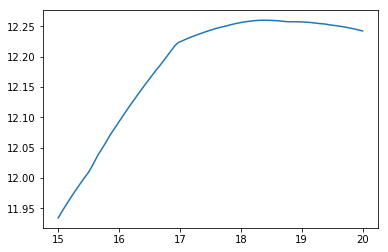

In [10]:
plt.plot(candidatos,scores)
#Imprimimos el valor obtimo de alpha
print(candidatos[np.where(scores==max(scores))[0][0]])
alphaop=candidatos[np.where(scores==max(scores))[0][0]]

In [11]:
clf = linear_model.Lasso(alpha=alphaop)
clf.fit(X_train, masaPlanetas_train)
errorporcentual=0
#Calculamos el error porcentual del validation
for i in range(n_val):
    errorporcentual+=abs(clf.predict(Xv[i])[0]-masaPlanetasv[i])/masaPlanetasv[i]
       
#Imprimimos el error porcentual promedio de Lasso
print(errorporcentual*100/n_val)




4751.84722953


C:\Users\Mateo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Mateo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Mateo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarn

In [25]:
#Como podemos ver este método tiene un error porcentual promedio de 4751.84%
